In [2]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import data as pdr
import datetime as dt

#To handle floats in Python 2
from __future__ import division

In [3]:
#Setting the end date to today
end = dt.datetime.now()
#Start date set to 1 year back
start = dt.datetime(end.year-1,end.month,end.day)

In [4]:
stocks = ['TCS.NS','HCLTECH.NS','INFY.NS','TECHM.NS','WIPRO.NS','MINDTREE.NS','OFSS.NS','TATAELXSI.NS','INFIBEAM.NS','NIITLTD.NS']
df = pdr.get_data_yahoo(stocks, start, end)

In [5]:
# df.index, df.columns

In [6]:
Close = df.Close
Close.head()

Symbols,TCS.NS,HCLTECH.NS,INFY.NS,TECHM.NS,WIPRO.NS,MINDTREE.NS,OFSS.NS,TATAELXSI.NS,INFIBEAM.NS,NIITLTD.NS
Date,,,,,,,,,,
2020-10-05,2705.800049,824.200012,1048.699951,841.250000,333.950012,1349.449951,3024.100098,1346.750000,32.898479,137.149994
2020-10-06,2714.300049,829.150024,1055.750000,847.400024,330.049988,1371.949951,3033.899902,1392.750000,34.525673,136.000000
2020-10-07,2735.949951,828.049988,1066.550049,846.349976,335.299988,1388.199951,3007.850098,1381.099976,36.236309,133.750000
2020-10-08,2825.699951,849.549988,1093.699951,860.299988,359.450012,1461.150024,3059.550049,1401.449951,35.693913,135.699997
2020-10-09,2812.949951,855.750000,1106.800049,854.150024,374.000000,1504.250000,3073.750000,1394.050049,36.695259,131.699997


In [7]:
Close[Close.index > end - dt.timedelta(days=100)].describe(percentiles=[0.1,0.5,0.9])

Symbols,TCS.NS,HCLTECH.NS,INFY.NS,TECHM.NS,WIPRO.NS,MINDTREE.NS,OFSS.NS,TATAELXSI.NS,INFIBEAM.NS,NIITLTD.NS
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,3518.062312,1117.671011,1655.273190,1296.709420,611.323912,3302.867396,4384.340548,4717.159399,45.348551,314.900727
std,269.910308,119.340689,64.909321,161.433335,46.643121,669.691510,381.856877,563.416483,3.851833,23.084304
min,3167.449951,967.950012,1541.699951,1045.900024,524.849976,2495.699951,3574.500000,3826.199951,39.900002,270.850006
10%,3197.200049,979.280005,1561.909961,1077.730005,538.149976,2555.180078,3737.020020,4199.080078,41.509999,288.890002
50%,3472.949951,1119.449951,1677.750000,1380.599976,615.500000,2925.699951,4512.250000,4487.100098,44.400002,313.450012
90%,3854.029980,1279.880029,1730.910010,1461.979956,668.670020,4236.119922,4764.349805,5676.699902,51.449998,350.339996
max,3954.550049,1358.199951,1763.849976,1521.500000,686.450012,4601.000000,4866.850098,5889.600098,54.599998,372.299988


<AxesSubplot:xlabel='Date'>

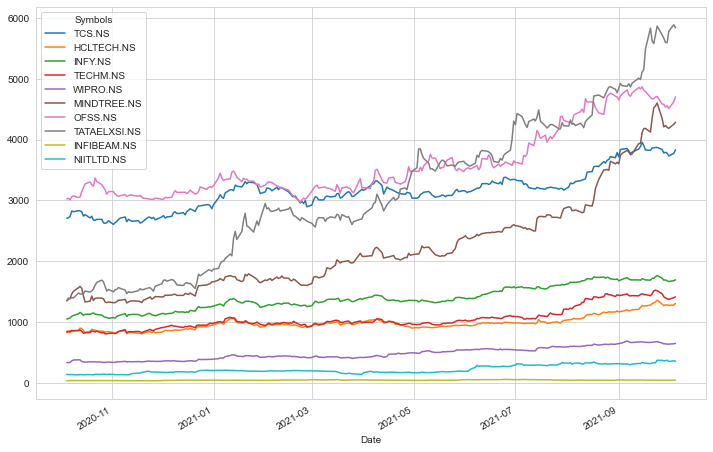

In [8]:
Close.plot(figsize=(12,8))

In [9]:
Adj = df['Adj Close']
Adj.head()

Symbols,TCS.NS,HCLTECH.NS,INFY.NS,TECHM.NS,WIPRO.NS,MINDTREE.NS,OFSS.NS,TATAELXSI.NS,INFIBEAM.NS,NIITLTD.NS
Date,,,,,,,,,,
2020-10-05,2670.277588,803.437500,1026.477295,803.973511,333.200897,1333.093018,2860.387451,1338.188965,32.862087,135.971725
2020-10-06,2678.665771,808.262756,1033.377808,809.850952,329.309631,1355.320190,2869.656738,1383.896484,34.487480,134.831619
2020-10-07,2700.031494,807.190430,1043.949097,808.847412,334.547852,1371.373291,2845.017090,1372.320557,36.196224,132.600952
2020-10-08,2788.603516,828.148804,1070.523560,822.179321,358.643707,1443.439209,2893.918213,1392.541138,35.654427,134.534195
2020-10-09,2776.020508,834.192688,1083.346191,816.301880,373.161072,1486.016724,2907.349609,1385.188354,36.654667,130.568558


In [10]:
rets_df = Adj.pct_change()

rets_df.tail()

Symbols,TCS.NS,HCLTECH.NS,INFY.NS,TECHM.NS,WIPRO.NS,MINDTREE.NS,OFSS.NS,TATAELXSI.NS,INFIBEAM.NS,NIITLTD.NS
Date,,,,,,,,,,
2021-09-29,0.003374,0.009614,0.003053,-0.013224,0.001798,0.005704,-0.009742,-0.011984,-0.016432,0.000831
2021-09-30,-0.004312,-0.001288,-0.010075,-0.010571,-0.010379,-0.007514,0.004919,-0.000661,-0.013127,0.030588
2021-10-01,-0.012012,-0.004533,-0.005999,-0.006772,0.003391,-0.003690,-0.009592,0.033741,0.009674,-0.060838
2021-10-04,0.011554,0.003847,0.008167,0.020274,0.007544,0.016346,0.024378,0.018469,0.041916,0.033462
2021-10-05,0.015901,0.020725,0.008369,0.010007,0.009048,0.007548,0.017481,-0.008396,0.000000,-0.022831


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

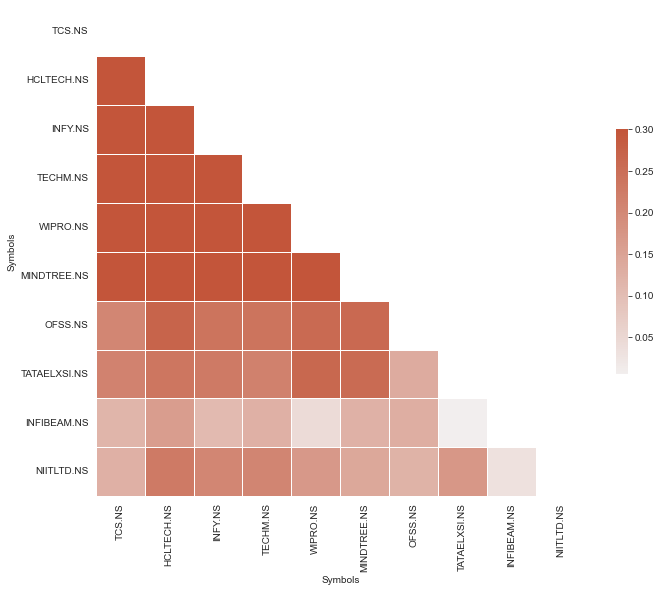

In [11]:
# Generate a large random dataset
rs = np.random.RandomState(33)
# Compute the correlation matrix
corr = rets_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

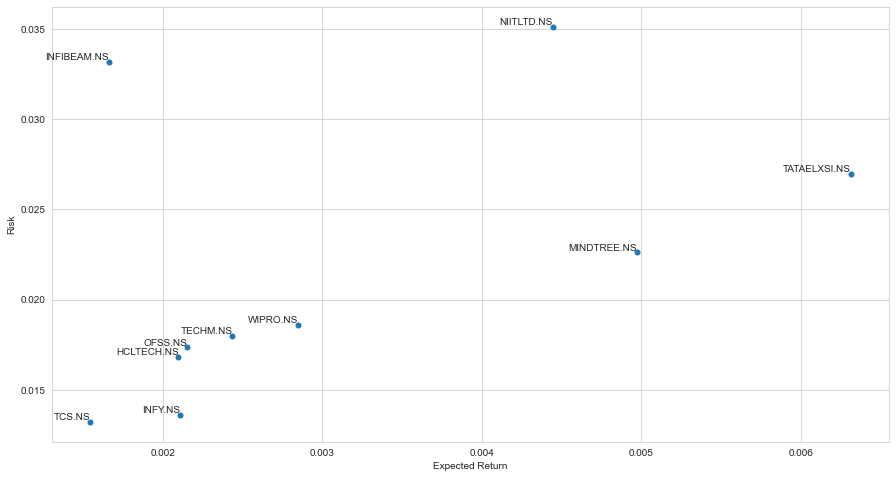

In [12]:
rets = rets_df.dropna()
plt.figure(figsize=(15,8))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(0,0),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    )

In [17]:
rets.head()

Symbols,TCS.NS,HCLTECH.NS,INFY.NS,TECHM.NS,WIPRO.NS,MINDTREE.NS,OFSS.NS,TATAELXSI.NS,INFIBEAM.NS,NIITLTD.NS
Date,,,,,,,,,,
2020-10-06,0.003141,0.006006,0.006723,0.007310,-0.011678,0.016673,0.003241,0.034156,0.049461,-0.008385
2020-10-07,0.007976,-0.001327,0.010230,-0.001239,0.015907,0.011845,-0.008586,-0.008365,0.049547,-0.016544
2020-10-08,0.032804,0.025965,0.025456,0.016483,0.072025,0.052550,0.017188,0.014735,-0.014968,0.014579
2020-10-09,-0.004512,0.007298,0.011978,-0.007149,0.040479,0.029497,0.004641,-0.005280,0.028054,-0.029477
2020-10-12,0.006061,0.011744,0.022859,0.003220,0.009358,0.038624,-0.008751,0.058463,-0.007959,-0.014806


In [16]:
rets['TCS.NS'].quantile(0.05)

-0.019621738936184147

In [18]:
# This means that with 95% confidence, the worst daily loss will not exceed 1.96% (of the investment).

In [19]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['TCS.NS']

sigma = rets.std()['TCS.NS']

In [24]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for TCS')

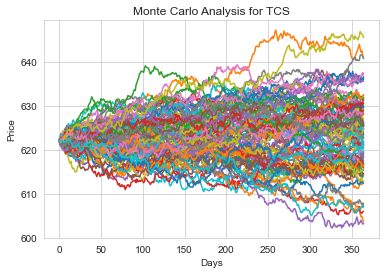

In [25]:
start_price = 622.049 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for TCS')

In [27]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for TCS Stock after 365 days')

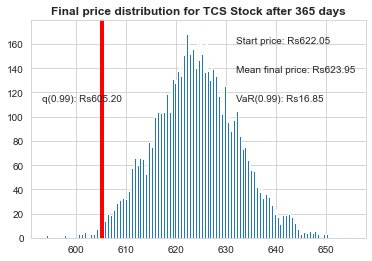

In [30]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: Rs%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: Rs%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): Rs%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): Rs%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for TCS Stock after %s days" %days, weight='bold')

In [31]:
# TCS's stock is pretty stable. 
# The starting price that we had was INR622.05, and the average final price over 10,000 runs was INR623.95.
# The red line indicates the value of stock at risk at the desired confidence interval. 
# For every stock, we'd be risking INR16.85, 99% of the time.